In [39]:
 %config Completer.use_jedi = False 

AttributeError: Completer

In [ ]:
import torch
from modules.dataset_3DPW import ImageWise3DPW
from modules.utils.data_utils import get_relevant_keypoints
from modules.utils.image_utils import transform, transform_visualize, crop_box, plot_tensor
from modules.utils.image_utils import to_tensor, visualize_mesh
from PIL import Image

### Dataset: 3DPW

In [ ]:
train_data = ImageWise3DPW(
    root_path='../3DPW',
    num_required_keypoints=8,
)

train_loader = torch.utils.data.DataLoader(
        dataset=train_data,
        batch_size=1,
        shuffle=False,)
train_iter = iter(train_loader)



In [ ]:
data = next(train_iter)
img = data['img']
betas = data['betas']
poses = data['poses']
poses2d = data['poses2d']
cam_pose = data['cam_pose']
cam_intr = data['cam_intr']
trans = data['trans']
poses3d = data['poses3d']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


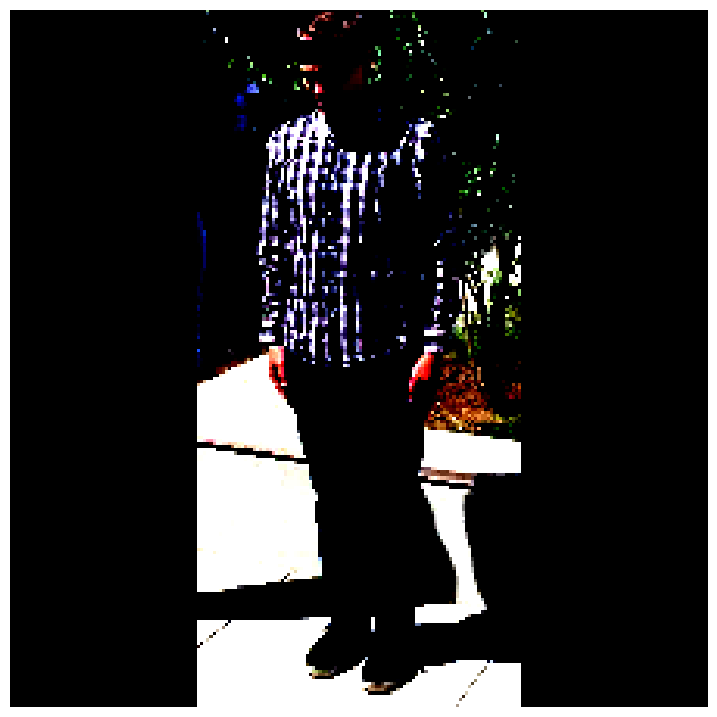

In [ ]:
plot_tensor(img[0])

In [ ]:
print(img.shape, betas.shape, poses.shape, poses2d.shape, cam_pose.shape)

torch.Size([1, 3, 224, 224]) torch.Size([1, 10]) torch.Size([1, 72]) torch.Size([1, 3, 18]) torch.Size([1, 4, 4])


#### Concat Datasets

In [ ]:
class ConcatDatasets(torch.utils.data.Dataset)
    def __init__(self, *datasets):
        self.datasets = datasets
        sum_length = 0
        self.accumulated_lens = [0]
        for dataset in datasets:
            sum_length += len(dataset)
            self.accumulated_lens.append(sum_length)
    
    def __get_item__(self, index):
        for i, accumulated_len in enumerate(self.accumulated_lens):
            if accumulated_len > index:
                return self.datasets[i][index-self.accumulated_lens[i-1]+1]
    
    def __len__(self):
        return accumulated_lens[-1]        

### Model

In [ ]:
from modules.models import get_model
#from start_train import start_training

In [ ]:
model = get_model()

In [ ]:
model

PoseNetXtreme(
  (encoder): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
    

### Visualization

1920 1080
6890


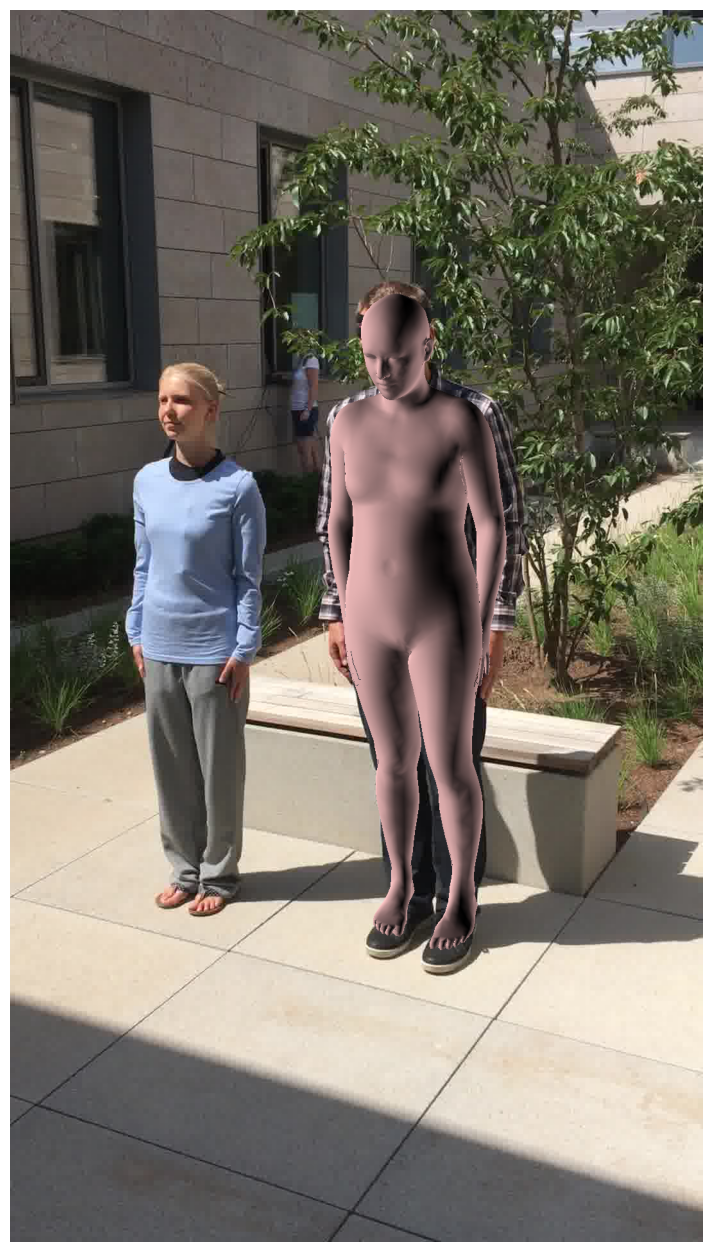

In [ ]:
img_path = data['img_path'][0]
orig_img = to_tensor(Image.open(img_path))
rend_img = visualize_mesh(orig_img, betas, poses, cam_pose[0], cam_intr[0], trans)
plot_tensor(rend_img)

In [ ]:
import start_train

In [ ]:
start_training()

{'mpve': 0}
0 loss_smpl tensor(0.7374, grad_fn=<AddBackward0>)
0 loss_verts tensor(1.0045, grad_fn=<L1LossBackward>)
1 loss_smpl tensor(0.7877, grad_fn=<AddBackward0>)
1 loss_verts tensor(0.5168, grad_fn=<L1LossBackward>)
2 loss_smpl tensor(0.6778, grad_fn=<AddBackward0>)
2 loss_verts tensor(0.3959, grad_fn=<L1LossBackward>)
3 loss_smpl tensor(0.6836, grad_fn=<AddBackward0>)
3 loss_verts tensor(0.5055, grad_fn=<L1LossBackward>)
4 loss_smpl tensor(0.9988, grad_fn=<AddBackward0>)
4 loss_verts tensor(0.6204, grad_fn=<L1LossBackward>)
5 loss_smpl tensor(0.7309, grad_fn=<AddBackward0>)
5 loss_verts tensor(0.6507, grad_fn=<L1LossBackward>)
6 loss_smpl tensor(0.7933, grad_fn=<AddBackward0>)
6 loss_verts tensor(0.5715, grad_fn=<L1LossBackward>)
7 loss_smpl tensor(0.5867, grad_fn=<AddBackward0>)
7 loss_verts tensor(0.9967, grad_fn=<L1LossBackward>)
8 loss_smpl tensor(0.8372, grad_fn=<AddBackward0>)
8 loss_verts tensor(0.6851, grad_fn=<L1LossBackward>)
9 loss_smpl tensor(0.7625, grad_fn=<AddBack

KeyboardInterrupt: 

In [ ]:
from yacs.config import CfgNode as CN

In [ ]:
cfg = CN()
cfg.LOSS = CN()
cfg.LOSS.loss_smpl = 2
cfg.LOSS.loss_verts = 1.
cfg.LOSS.loss_kp_2d = 0
cfg.LOSS.loss_kp_3d = 0

In [ ]:
print(cfg)

LOSS:
  loss_kp_2d: 0
  loss_kp_3d: 0
  loss_smpl: 0
  loss_verts: 1.0


In [ ]:
for i in cfg.LOSS:
    print(cfg.LOSS[i])

0
1.0
0
0


cfg.LOSS.items()

In [ ]:
loss_dict = {"loss_smpl": 1, 
                 "loss_verts": 2,
                 "loss_kp_2d": 3,
                 "loss_kp_3d": 4}
a = {key: (criterion, cfg.LOSS[key]) for key, criterion in loss_dict.items() if cfg.LOSS[key] != 0 }
a

{'loss_smpl': (1, 2), 'loss_verts': (2, 1.0)}

In [42]:
for key,loss_val  in zip(loss_dict.items(), loss_dict.items()):
    print(key, loss_val)

('loss_smpl', 1) ('loss_smpl', 1)
('loss_verts', 2) ('loss_verts', 2)
('loss_kp_2d', 3) ('loss_kp_2d', 3)
('loss_kp_3d', 4) ('loss_kp_3d', 4)
